In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests            
from bs4 import BeautifulSoup 
import sklearn


# NLP 
import spacy
from nltk.corpus import gutenberg, stopwords
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import sys
import tweepy

consumer_key="UWnNNciwtXq7zJNkpdXc0nUeb"
consumer_secret="P7mfzghpRuRNqH25EslswM2krjXXGb4BoPVeNkOC2JKfInw2M0"
access_key="4807082333-jaKawSkMU5FZ9mBi7EeEJB6kqDWish0V8wv5O82"
access_secret="9P9cmfsaeyMenUiTq2IEYTy6amA6zMtcCEOExpDXW7twc"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

#for status in tweepy.Cursor(api.home_timeline).items(5):
   # print(status.text)

In [3]:
handles = ['time','cnn','nytimes','foxnews', 'HuffPost','theonion','newsweek','wsj','theeconomist','NPR']

In [4]:
import csv

In [5]:
def get_all_tweets(screen_name):
#Twitter only allows access to a users most recent 3240 tweets with this method
#authorize twitter, initialize tweepy

        #initialize a list to hold all the tweepy Tweets
    alltweets = []

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200, tweet_mode='extended', retweet = False)
    
    #save most recent tweets
    alltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("getting tweets before %s" % oldest)
        

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print("...%s tweets downloaded so far" % (len(alltweets)))
    
    def return_text(tweet):
        if hasattr(tweet, 'text'):
            return tweet.text
        elif hasattr(tweet, 'full_text'):
            return tweet.full_text
        else:
            return ''
    
    #transform the tweepy tweets into a 2D array that will populate the csv	
    outtweets = [[tweet.id_str, tweet.created_at, return_text(tweet)] for tweet in alltweets]

    #write the csv
    with open('%s_tweets.csv' % screen_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)

    pass

In [6]:
for h in handles:
    get_all_tweets(h)

getting tweets before 1134761540610088959
...400 tweets downloaded so far
getting tweets before 1133851778934611972
...600 tweets downloaded so far
getting tweets before 1132950831249203199
...800 tweets downloaded so far
getting tweets before 1131968126365720576
...1000 tweets downloaded so far
getting tweets before 1131214522931392512
...1200 tweets downloaded so far
getting tweets before 1130368830071607300
...1400 tweets downloaded so far
getting tweets before 1129318155308949504
...1600 tweets downloaded so far
getting tweets before 1128502791704588287
...1800 tweets downloaded so far
getting tweets before 1127667276524740607
...2000 tweets downloaded so far
getting tweets before 1126607829429837824
...2200 tweets downloaded so far
getting tweets before 1125796193118949376
...2400 tweets downloaded so far
getting tweets before 1125007283107266560
...2600 tweets downloaded so far
getting tweets before 1124027043472191487
...2800 tweets downloaded so far
getting tweets before 112322

...1600 tweets downloaded so far
getting tweets before 1130729965291560959
...1800 tweets downloaded so far
getting tweets before 1130229163405848575
...2000 tweets downloaded so far
getting tweets before 1129617621295468543
...2200 tweets downloaded so far
getting tweets before 1129172193462636543
...2400 tweets downloaded so far
getting tweets before 1128721766073937928
...2600 tweets downloaded so far
getting tweets before 1128281316548653060
...2800 tweets downloaded so far
getting tweets before 1127790586373734404
...3000 tweets downloaded so far
getting tweets before 1127195957307891711
...3200 tweets downloaded so far
getting tweets before 1126689841834409984
...3232 tweets downloaded so far
getting tweets before 1126639765607079935
...3232 tweets downloaded so far
getting tweets before 1134784164631330815
...400 tweets downloaded so far
getting tweets before 1134051856685182976
...600 tweets downloaded so far
getting tweets before 1133266671395921920
...800 tweets downloaded so

In [7]:
import csv

spreadsheet_filenames = [
    'cnn_tweets.csv',
    'foxnews_tweets.csv',
    'HuffPost_tweets.csv',
    'newsweek_tweets.csv',
    'NPR_tweets.csv',
    'nytimes_tweets.csv',
    'theeconomist_tweets.csv',
    'theonion_tweets.csv',
    'time_tweets.csv',
    'wsj_tweets.csv',
]



In [8]:
#add all csvs together
li = []

for filename in spreadsheet_filenames:
    df = pd.read_csv(filename, index_col=None, header=0)
    #add column and populate it with the beginning of the .csv name
    channel = filename[0:filename.find("_")]
    df['Author'] = [channel]*len(df)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [9]:
#make sure all the data is there
df['Author'].value_counts()

HuffPost        3244
nytimes         3244
wsj             3241
foxnews         3233
newsweek        3232
cnn             3226
NPR             3221
theeconomist    3214
time            3207
theonion        3207
Name: Author, dtype: int64

In [10]:
df.head(20)

,id,created_at,text,Author
0,1135715867596152832,2019-06-04 01:12:18,"""This is incredible,"" says @ErinBurnett, of Ja...",cnn
1,1135715331778011137,2019-06-04 01:10:10,"""It's never a good idea to deny saying somethi...",cnn
2,1135715318083596289,2019-06-04 01:10:07,This is a timelapse of a 30-minute trip from 2...,cnn
3,1135714861139353600,2019-06-04 01:08:18,"""The Trump universe obviously thinks that it i...",cnn
4,1135713864543289345,2019-06-04 01:04:20,"Forget naughty and nice, President Trump keeps...",cnn
5,1135713863247249409,2019-06-04 01:04:20,White House senior adviser Jared Kushner says ...,cnn
6,1135713161653489664,2019-06-04 01:01:32,"""In the end, much more important than any spec...",cnn
7,1135713051410407426,2019-06-04 01:01:06,Apple has driven more than 4 million miles to ...,cnn
8,1135710528909787137,2019-06-04 00:51:05,"Apple users, here's what you need to know:\n\n...",cnn
9,1135708035475804161,2019-06-04 00:41:10,Apple's iTunes changed music. Then streaming k...,cnn


# 2. Data Cleaning

In [11]:
#looks like we need to remove hyperlinks and special characters
stop_words = stopwords.words('english')
def clean_tweet(text):
    #remove hyperlinks and special characters
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    #remove "RT" text
    text = re.sub('RT ', '', text)
    #remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text
                    
df['text'] = df['text'].apply(lambda x: clean_tweet(x))
df.head(10)

,id,created_at,text,Author
0,1135715867596152832,2019-06-04 01:12:18,This incredible says Jared Kushner Axios inter...,cnn
1,1135715331778011137,2019-06-04 01:10:10,It never good idea deny saying something tape ...,cnn
2,1135715318083596289,2019-06-04 01:10:07,This timelapse 30 minute trip 254 miles Earth,cnn
3,1135714861139353600,2019-06-04 01:08:18,The Trump universe obviously thinks perfectly ...,cnn
4,1135713864543289345,2019-06-04 01:04:20,Forget naughty nice President Trump keeps nast...,cnn
5,1135713863247249409,2019-06-04 01:04:20,White House senior adviser Jared Kushner says ...,cnn
6,1135713161653489664,2019-06-04 01:01:32,In end much important specific election result...,cnn
7,1135713051410407426,2019-06-04 01:01:06,Apple driven 4 million miles rebuild Apple Map...,cnn
8,1135710528909787137,2019-06-04 00:51:05,Apple users need know iTunes replaced 18 years...,cnn
9,1135708035475804161,2019-06-04 00:41:10,Apple iTunes changed music Then streaming kill...,cnn


In [12]:
#prepare data for parsing and tokenizing
tweet_list = df.text.tolist()
author_list = df.Author.tolist()

In [13]:
print(tweet_list)

['This incredible says Jared Kushner Axios interview It Trump wants experience resume says Kushner role Jared Kushner sits sits', 'It never good idea deny saying something tape saying something denying said exactly President said Trump tweeted denial tape recorded remark referring Meghan Markle nasty', 'This timelapse 30 minute trip 254 miles Earth', 'The Trump universe obviously thinks perfectly appropriate get help foreigners win presidential elections says CNN Jeffrey Toobin responding Jared Kushner interview That illegal', 'Forget naughty nice President Trump keeps nasty list CNN Jeanne Moos reports', 'White House senior adviser Jared Kushner says sure alert FBI Russia came calling', 'In end much important specific election result democracy three co equal branches government holding accountable everybody allowing us king instead president', 'Apple driven 4 million miles rebuild Apple Maps ground new 3D capabilities like look around WWDC19', 'Apple users need know iTunes replaced 18

In [14]:
#parse data
nlp = spacy.load('en')
#increase max length since the data is too large for nlp to parse the whole thing
nlp.max_length=2500000
#parse tweets
tweets_full = ' '.join(df['text'])


tweets_full = nlp(tweets_full)

In [15]:
import nltk
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

#Create list to hold lemmatized sentences
tweets = []

#tokenize, get lemmas, and rejoin
for tweet in tweet_list:
    words = word_tokenize(tweet)                                 
    word_lemma = [lemmatizer.lemmatize(word) for word in words] 
    sent_lemma = ' '.join(word_lemma)                           
    tweets.append(sent_lemma)


tweets[:5]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karagrosse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['This incredible say Jared Kushner Axios interview It Trump want experience resume say Kushner role Jared Kushner sits sits',
 'It never good idea deny saying something tape saying something denying said exactly President said Trump tweeted denial tape recorded remark referring Meghan Markle nasty',
 'This timelapse 30 minute trip 254 mile Earth',
 'The Trump universe obviously think perfectly appropriate get help foreigner win presidential election say CNN Jeffrey Toobin responding Jared Kushner interview That illegal',
 'Forget naughty nice President Trump keep nasty list CNN Jeanne Moos report']

In [16]:
print('We have {} tweets and {} tokens.'.format(len(tweets), len(tweets_full)))

We have 32269 tweets and 369664 tokens.


In [17]:
#put into new dataframe. We just need the tweets and the authors
df2 = pd.DataFrame()
df2['Tweet'] = tweets
df2['Author'] = author_list

# Remove any blank tweets
df2 = df2[df2.Tweet!=""]
df2.head()

,Tweet,Author
0,This incredible say Jared Kushner Axios interv...,cnn
1,It never good idea deny saying something tape ...,cnn
2,This timelapse 30 minute trip 254 mile Earth,cnn
3,The Trump universe obviously think perfectly a...,cnn
4,Forget naughty nice President Trump keep nasty...,cnn


# 3. Natural Language Processing

In [18]:
#pare down data
df3 = pd.DataFrame()
for handel in handles:
    tempdf = df2[df2['Author']==handel][:500]
    df3 = pd.concat([tempdf, df3])

In [19]:
df3.Author.value_counts()

nytimes         500
foxnews         500
theeconomist    500
wsj             500
time            500
newsweek        500
NPR             500
cnn             500
HuffPost        500
theonion        500
Name: Author, dtype: int64

In [20]:
#split into training and testing, with 25% reserved as test set
from sklearn.model_selection import train_test_split
tweet_train, tweet_test = train_test_split(df3.Tweet, test_size=0.25, random_state = 42)

In [21]:
print(tweet_train.shape)
print(tweet_test.shape)

(3750,)
(1250,)


## 3.1.1 Clustering with K-means

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test  = train_test_split(df2.Tweet, df2.Author,test_size=0.25, random_state = 42)

# Calculate predicted values.
X=df3.Tweet
#convert categorical variables to numeric
X = pd.get_dummies(X)  
y = df3['Author'].apply(lambda x: str(x))
#one hot encoding and PCA
X_norm = normalize(X)
X_pca = PCA(.50).fit_transform(X_norm)
y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)



# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y,y_pred))

Comparing k-means clusters against the data:
col_0         0  1    2  3  4  5  6  7  8  9
Author                                      
HuffPost      0  0  499  0  0  0  1  0  0  0
NPR           0  0  500  0  0  0  0  0  0  0
cnn           0  0  500  0  0  0  0  0  0  0
foxnews       0  0  495  0  5  0  0  0  0  0
newsweek      0  0  482  6  0  5  0  0  5  2
nytimes       0  0  500  0  0  0  0  0  0  0
theeconomist  1  1  498  0  0  0  0  0  0  0
theonion      0  0  500  0  0  0  0  0  0  0
time          0  0  500  0  0  0  0  0  0  0
wsj           0  0  494  0  0  0  0  6  0  0


In [23]:
print(X_norm)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


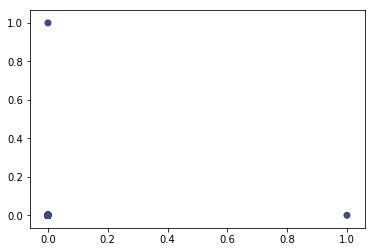

In [24]:
plt.scatter(X_norm[:,0], X_norm[:,1], c = y_pred)
print(X_norm)

## 3.1.2 Clustering with Spectral Clustering

In [25]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=10

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_norm)

#Predicted clusters.
predict=sc.fit_predict(X_norm)

#Graph results.
#plt.scatter(X_norm_tfidf[:, 0], X_norm_tfidf[:, 1], c=predict)
#plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,predict))

Comparing the assigned categories to the ones in the data:
col_0           0  1  2   3  4  5  6  7  8  9
Author                                       
HuffPost      500  0  0   0  0  0  0  0  0  0
NPR           500  0  0   0  0  0  0  0  0  0
cnn           500  0  0   0  0  0  0  0  0  0
foxnews       500  0  0   0  0  0  0  0  0  0
newsweek      450  7  9  10  0  6  6  6  0  6
nytimes       500  0  0   0  0  0  0  0  0  0
theeconomist  500  0  0   0  0  0  0  0  0  0
theonion      500  0  0   0  0  0  0  0  0  0
time          494  0  0   0  0  0  0  0  6  0
wsj           494  0  0   0  6  0  0  0  0  0


## 3.2 TFidf Unsupervised feature generation

In [26]:
vectorizer = TfidfVectorizer(max_df=0.75, # drop words that occur in more than 75% of tweets
                             min_df=2, # only use words that appear at least twice
                             stop_words = "english",
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#use inverse document frequencies in weighting
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#vectorize training data
X_train_tfidf = vectorizer.fit_transform(tweet_train)

#vectorize test data
X_test_tfidf = vectorizer.transform(tweet_test)


In [34]:
#put tfidf in dataframe and use that to make clusters
#How do I cluster tfidf values?
tfidf_df = pd.DataFrame(X_train_tfidf, sep="\t")

TypeError: __init__() got an unexpected keyword argument 'sep'

In [35]:
type(X_train_tfidf)

scipy.sparse.csr.csr_matrix

In [28]:
kmeans = KMeans(n_clusters=10).fit(X_train_tfidf)
print(pd.crosstab(y,kmeans))

col_0         KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,\n    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',\n    random_state=None, tol=0.0001, verbose=0)
Author                                                                                                                                                                                                     
HuffPost                                                    500                                                                                                                                            
NPR                                                         500                                                                                                                                            
cnn                                                         500                                                                                                                         

In [29]:
print(tfidf_df)

                                                      0
0       (0, 1328)\t0.4740985712005391\n  (0, 2073)\t...
1       (0, 3685)\t0.402676354675037\n  (0, 652)\t0....
2       (0, 2502)\t0.27847113874626683\n  (0, 2758)\...
3       (0, 2041)\t0.409780332783046\n  (0, 2360)\t0...
4       (0, 8)\t0.3781017535100318\n  (0, 224)\t0.36...
5       (0, 714)\t0.21905403952051264\n  (0, 2835)\t...
6       (0, 3214)\t0.168848728332217\n  (0, 4363)\t0...
7       (0, 4015)\t0.41924189418656904\n  (0, 2219)\...
8       (0, 1295)\t0.31260565701083326\n  (0, 1226)\...
9       (0, 1170)\t0.3564644547356111\n  (0, 3244)\t...
10      (0, 3686)\t0.20491832512309532\n  (0, 2334)\...
11      (0, 3686)\t0.17628717153292042\n  (0, 2096)\...
12      (0, 4363)\t0.16420529514658785\n  (0, 3686)\...
13      (0, 2482)\t0.2929633851815245\n  (0, 4702)\t...
14      (0, 652)\t0.2109735820059\n  (0, 3214)\t0.14...
15      (0, 3721)\t0.3781588886754316\n  (0, 6)\t0.3...
16      (0, 4007)\t0.2214407766762774\n  (0, 140

In [30]:
# Calculate weights on training data
weights = np.asarray(X_train_tfidf.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'word': vectorizer.get_feature_names(), 'avg_weight': weights})
print("Train:\n", weights_df.sort_values(by='avg_weight', ascending=False).head(10))

# Calculate weights on test data
weights = np.asarray(X_test_tfidf.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'word': vectorizer.get_feature_names(), 'avg_weight': weights})
print("\nTest:\n", weights_df.sort_values(by='avg_weight', ascending=False).head(10))

Train:
            word  avg_weight
4363      trump    0.019676
2835        new    0.013940
3686        say    0.012942
3214  president    0.012597
4705       year    0.011002
4007      state    0.008612
3061     people    0.008530
3658       said    0.008462
4273       time    0.007531
1404   election    0.007189

Test:
            word  avg_weight
4363      trump    0.021930
3686        say    0.014539
3214  president    0.013946
2835        new    0.012793
4705       year    0.011648
4007      state    0.010504
3061     people    0.009888
110    abortion    0.009098
4681      world    0.009064
2065      house    0.008308


In [31]:
#how do I show what authors this model would predict?

Our training and testing our similar for the top weighted words, but are a little different for the last 5.
Let's look at how it can cluster the different authors.

## 3.3 Unsupervised feature generation with word2vec

In [32]:
import gensim
from gensim.models import word2vec

w2v_train = word2vec.Word2Vec(
    tweet_train,
    workers=4,     # Number of threads to run in parallel (if your computer does parallel processing).
    min_count=2,  # Minimum word count threshold.
    window=6,      # Number of words around target word to consider.
    sg=0,          # Use CBOW because our corpus is small.
    sample=1e-3 ,  # Penalize frequent words.
    size=300,      # Word vector length.
    hs=1           # Use hierarchical softmax.
)


w2v_test = word2vec.Word2Vec(
    tweet_test,
    workers=4,     # Number of threads to run in parallel (if your computer does parallel processing).
    min_count=2,  # Minimum word count threshold.
    window=6,      # Number of words around target word to consider.
    sg=0,          # Use CBOW because our corpus is small.
    sample=1e-3 ,  # Penalize frequent words.
    size=300,      # Word vector length.
    hs=1           # Use hierarchical softmax.
)

In [33]:
# Calculate weights on training data
weights = np.asarray(w2v_train(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'word': vectorizer.get_feature_names(), 'avg_weight': weights})
print("Train:\n", weights_df.sort_values(by='avg_weight', ascending=False).head(10))

# Calculate weights on test data
weights = np.asarray(w2v_test .mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'word': vectorizer.get_feature_names(), 'avg_weight': weights})
print("\nTest:\n", weights_df.sort_values(by='avg_weight', ascending=False).head(10))

TypeError: 'Word2Vec' object is not callable